In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import seaborn as sns
import string
import warnings
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
from collections import Counter
cnt=Counter()
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HARISH A K\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [37]:
log=pd.read_csv("D:\log.csv")

In [38]:
consumerKey=log['key'][0]
consumerKeySecret=log['key'][1]
AccessToken=log['key'][2]
AccessTokenSecret=log['key'][3]

In [39]:
authenticate=tweepy.OAuthHandler(consumerKey,consumerKeySecret)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [40]:
keywords = '#Bitcoin'
limit=10000
tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=50000, tweet_mode='extended',lang="en").items(limit)
# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')

# create DataFrame
columns = ['User', 'Tweet']
data = []
for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])
df1 = pd.DataFrame(data, columns=columns)
print(df1)

                 User                                              Tweet
0         VarunsSinha  Current Bitcoin price is $21109.36 USD.\n\nFol...
1         audumoses11  RT @ashwsbreal: Rest $500 #Bitcoin will be dis...
2     bmurphypointman  #travel #bitcoin #tumblr #twitter #facebook #i...
3       IndoCryptoLaw  RT @BTC_Archive: 💥FORBES: #Bitcoin adoption co...
4     chrisjacksonayo  RT @RichardHeartWin: Stop hiding the truth abo...
...               ...                                                ...
9995      jcrosas2022  RT @RichardHeartWin: The floor is lava. #bitco...
9996      VarunsSinha  Current Bitcoin price is $21086 USD.\n\nFollow...
9997  nguyentuyet7290       RT @MMCrypto: Who is still holding #Bitcoin?
9998          0xIndia  🇮🇳 बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼\n  ✅BestA...
9999         Big10Win  RT @TaylorMuskk: Hello guys! Good start to the...

[10000 rows x 2 columns]


In [41]:
df1.to_csv('df1.csv')

In [42]:
#Preprocessing
stopword = nltk.corpus.stopwords.words('english')

#Basic Cleaning removing emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"# flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"                        
                           "]+", flags=re.UNICODE)
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#Wimbledon2022', 'Wimbledon2022', text)
    text = re.sub(r'#Wimbledon', 'Wimbledon', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+?', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'_', '', text)
    text = re.sub(r'/n/n', '', text)
    text = re.sub(r':', '', text)
    text = re.sub(r';', '', text)
    text = re.sub(r',', '', text)
    text = re.sub(r'1', '', text)
    text = re.sub(r'2', '', text)
    text = re.sub(r'3', '', text)
    text = re.sub(r'4', '', text)
    text = re.sub(r'5', '', text)
    text = re.sub(r'6', '', text)
    text = re.sub(r'7', '', text)
    text = re.sub(r'8', '', text)
    text = re.sub(r'9', '', text)
    text = re.sub(r'0', '', text)
    text = re.sub(r'🇮🇳', '', text)
    text = re.sub(r'&', '', text)
    text = re.sub(r'🇷🇴', '', text)
    text = re.sub(r'\n\n','',text)
    text = re.sub(r'\n','',text)
    text = re.sub(r'🧐🤔🤓🤔','',text)
    text = re.sub(r'’','',text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#cryptocurrency', 'cryptocurrency', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'£', '', text)
    text = re.sub(r'$', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text=emoji_pattern.sub(r'', text)
    text = re.sub(r'➡️','',text)
    return text
df1['Tweet']= df1['Tweet'].apply(cleanTxt)

#Creating new dataframe only for tweets
df_text=df1[['Tweet']].astype(str)

#Coverting to lower Case
df_text['Lower_Tweet']=df_text['Tweet'].str.lower()

#Removing Punctions
punc_to_remove=string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punc_to_remove))

df_text["Tweet_Punc"]=df_text['Tweet'].apply(lambda text: remove_punctuation(text))

#Stopwords
",".join(stopwords.words("english"))
STOPWORDS=set(stopwords.words("english"))

def remove_stopword(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
df_text["Tweet_Stop"]=df_text['Tweet_Punc'].apply(lambda text: remove_stopword(text))

#Removal of frequently appeared word
#Frequently appeared words
for text in df_text['Tweet_Stop'].values:
    for word in text.split():
        cnt[word]+=1
        
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df_text["Tweet_Freq"] = df_text["Tweet_Stop"].apply(lambda text: remove_freqwords(text))
n_rare_word=10
RAREWORDS=set([w for (w ,wc) in cnt.most_common()[:-n_rare_word-1:-1]])

def remove_rareword(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df_text['Rare_text']=df_text['Tweet_Freq'].apply(lambda text: remove_rareword(text))

#Steamming data

stemmer=PorterStemmer()

def stem_porter(text):
        return " ".join([stemmer.stem(word) for word in text.split()])
    
df_text["Tweet_Stemmed"]=df_text['Tweet_Stop'].apply(lambda text : stem_porter(text))

#Lemmatization
lematizer=WordNetLemmatizer()
lemmmatizer=WordNetLemmatizer()

wordnet_map={"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatized_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lematizer.lemmatize(word , wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_text["Tweet_Lemma"] = df_text["Tweet_Stop"].apply(lambda text: lemmatized_words(text))
#Dataframe
df_text

,Tweet,Lower_Tweet,Tweet_Punc,Tweet_Stop,Tweet_Freq,Rare_text,Tweet_Stemmed,Tweet_Lemma
0,Current Bitcoin price is $. USD.Follow for rec...,current bitcoin price is $. usd.follow for rec...,Current Bitcoin price is USDFollow for recent...,Current Bitcoin price USDFollow recent Bitcoin...,Current USDFollow recent updatesBitcoin crypto...,Current USDFollow recent updatesBitcoin crypto...,current bitcoin price usdfollow recent bitcoin...,Current Bitcoin price USDFollow recent Bitcoin...
1,Rest $ Bitcoin will be distributed to people...,rest $ bitcoin will be distributed to people...,Rest Bitcoin will be distributed to people ...,Rest Bitcoin distributed people soon,Rest distributed people soon,Rest distributed people soon,rest bitcoin distribut peopl soon,Rest Bitcoin distribute people soon
2,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel tumblr twitter facebook instagram dogec...,travel tumblr twitter facebook instagram dogec...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...
3,Archive FORBES Bitcoin adoption could hit % by .,archive forbes bitcoin adoption could hit % by .,Archive FORBES Bitcoin adoption could hit by,Archive FORBES Bitcoin adoption could hit,Archive FORBES adoption could hit,Archive FORBES adoption could hit,archiv forb bitcoin adopt could hit,Archive FORBES Bitcoin adoption could hit
4,Stop hiding the truth about Bitcoin Ethereum ...,stop hiding the truth about bitcoin ethereum ...,Stop hiding the truth about Bitcoin Ethereum ...,Stop hiding truth Bitcoin Ethereum HEXcom If y...,Stop hiding truth HEXcom If youre talking much...,Stop hiding truth HEXcom If youre talking much...,stop hide truth bitcoin ethereum hexcom if you...,Stop hiding truth Bitcoin Ethereum HEXcom If y...
...,...,...,...,...,...,...,...,...
9995,The floor is lava. bitcoin amp ethereum.,the floor is lava. bitcoin amp ethereum.,The floor is lava bitcoin amp ethereum,The floor lava bitcoin amp ethereum,The floor lava ethereum,The floor lava ethereum,the floor lava bitcoin amp ethereum,The floor lava bitcoin amp ethereum
9996,Current Bitcoin price is $ USD.Follow for rece...,current bitcoin price is $ usd.follow for rece...,Current Bitcoin price is USDFollow for recent...,Current Bitcoin price USDFollow recent Bitcoin...,Current USDFollow recent updatesBitcoin crypto...,Current USDFollow recent updatesBitcoin crypto...,current bitcoin price usdfollow recent bitcoin...,Current Bitcoin price USDFollow recent Bitcoin...
9997,Who is still holding Bitcoin?,who is still holding bitcoin?,Who is still holding Bitcoin,Who still holding Bitcoin,Who still holding,Who still holding,who still hold bitcoin,Who still hold Bitcoin
9998,बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼ BestAsk Ex...,बिटकॉइन(btc) आर्बिट्रेज संभावना ‼ bestask ex...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exch...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनbtc आर्बिट्रेज संभावना ‼ bestask exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...


In [43]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_text['Subjectivity'] = df_text['Tweet'].apply(getSubjectivity)
df_text['Polarity'] = df_text['Tweet'].apply(getPolarity)

df_text

,Tweet,Lower_Tweet,Tweet_Punc,Tweet_Stop,Tweet_Freq,Rare_text,Tweet_Stemmed,Tweet_Lemma,Subjectivity,Polarity
0,Current Bitcoin price is $. USD.Follow for rec...,current bitcoin price is $. usd.follow for rec...,Current Bitcoin price is USDFollow for recent...,Current Bitcoin price USDFollow recent Bitcoin...,Current USDFollow recent updatesBitcoin crypto...,Current USDFollow recent updatesBitcoin crypto...,current bitcoin price usdfollow recent bitcoin...,Current Bitcoin price USDFollow recent Bitcoin...,0.325,0.00
1,Rest $ Bitcoin will be distributed to people...,rest $ bitcoin will be distributed to people...,Rest Bitcoin will be distributed to people ...,Rest Bitcoin distributed people soon,Rest distributed people soon,Rest distributed people soon,rest bitcoin distribut peopl soon,Rest Bitcoin distribute people soon,0.300,0.20
2,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel tumblr twitter facebook instagram dogec...,travel tumblr twitter facebook instagram dogec...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,0.000,0.00
3,Archive FORBES Bitcoin adoption could hit % by .,archive forbes bitcoin adoption could hit % by .,Archive FORBES Bitcoin adoption could hit by,Archive FORBES Bitcoin adoption could hit,Archive FORBES adoption could hit,Archive FORBES adoption could hit,archiv forb bitcoin adopt could hit,Archive FORBES Bitcoin adoption could hit,0.000,0.00
4,Stop hiding the truth about Bitcoin Ethereum ...,stop hiding the truth about bitcoin ethereum ...,Stop hiding the truth about Bitcoin Ethereum ...,Stop hiding truth Bitcoin Ethereum HEXcom If y...,Stop hiding truth HEXcom If youre talking much...,Stop hiding truth HEXcom If youre talking much...,stop hide truth bitcoin ethereum hexcom if you...,Stop hiding truth Bitcoin Ethereum HEXcom If y...,0.200,0.20
...,...,...,...,...,...,...,...,...,...,...
9995,The floor is lava. bitcoin amp ethereum.,the floor is lava. bitcoin amp ethereum.,The floor is lava bitcoin amp ethereum,The floor lava bitcoin amp ethereum,The floor lava ethereum,The floor lava ethereum,the floor lava bitcoin amp ethereum,The floor lava bitcoin amp ethereum,0.000,0.00
9996,Current Bitcoin price is $ USD.Follow for rece...,current bitcoin price is $ usd.follow for rece...,Current Bitcoin price is USDFollow for recent...,Current Bitcoin price USDFollow recent Bitcoin...,Current USDFollow recent updatesBitcoin crypto...,Current USDFollow recent updatesBitcoin crypto...,current bitcoin price usdfollow recent bitcoin...,Current Bitcoin price USDFollow recent Bitcoin...,0.325,0.00
9997,Who is still holding Bitcoin?,who is still holding bitcoin?,Who is still holding Bitcoin,Who still holding Bitcoin,Who still holding,Who still holding,who still hold bitcoin,Who still hold Bitcoin,0.000,0.00
9998,बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼ BestAsk Ex...,बिटकॉइन(btc) आर्बिट्रेज संभावना ‼ bestask ex...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exch...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनbtc आर्बिट्रेज संभावना ‼ bestask exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,0.000,0.00


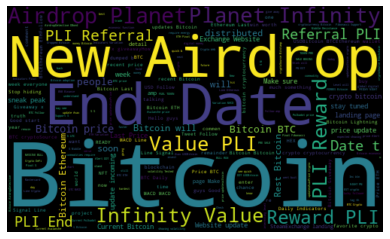

In [44]:
allWords = ' '.join( [twts for twts in df_text['Tweet']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [45]:
def analysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'    
    
df_text['Analysis']=df_text['Polarity'].apply(analysis)
df_text

,Tweet,Lower_Tweet,Tweet_Punc,Tweet_Stop,Tweet_Freq,Rare_text,Tweet_Stemmed,Tweet_Lemma,Subjectivity,Polarity,Analysis
0,Current Bitcoin price is $. USD.Follow for rec...,current bitcoin price is $. usd.follow for rec...,Current Bitcoin price is USDFollow for recent...,Current Bitcoin price USDFollow recent Bitcoin...,Current USDFollow recent updatesBitcoin crypto...,Current USDFollow recent updatesBitcoin crypto...,current bitcoin price usdfollow recent bitcoin...,Current Bitcoin price USDFollow recent Bitcoin...,0.325,0.00,neutral
1,Rest $ Bitcoin will be distributed to people...,rest $ bitcoin will be distributed to people...,Rest Bitcoin will be distributed to people ...,Rest Bitcoin distributed people soon,Rest distributed people soon,Rest distributed people soon,rest bitcoin distribut peopl soon,Rest Bitcoin distribute people soon,0.300,0.20,positive
2,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,travel tumblr twitter facebook instagram dogec...,travel tumblr twitter facebook instagram dogec...,travel bitcoin tumblr twitter facebook instagr...,travel bitcoin tumblr twitter facebook instagr...,0.000,0.00,neutral
3,Archive FORBES Bitcoin adoption could hit % by .,archive forbes bitcoin adoption could hit % by .,Archive FORBES Bitcoin adoption could hit by,Archive FORBES Bitcoin adoption could hit,Archive FORBES adoption could hit,Archive FORBES adoption could hit,archiv forb bitcoin adopt could hit,Archive FORBES Bitcoin adoption could hit,0.000,0.00,neutral
4,Stop hiding the truth about Bitcoin Ethereum ...,stop hiding the truth about bitcoin ethereum ...,Stop hiding the truth about Bitcoin Ethereum ...,Stop hiding truth Bitcoin Ethereum HEXcom If y...,Stop hiding truth HEXcom If youre talking much...,Stop hiding truth HEXcom If youre talking much...,stop hide truth bitcoin ethereum hexcom if you...,Stop hiding truth Bitcoin Ethereum HEXcom If y...,0.200,0.20,positive
...,...,...,...,...,...,...,...,...,...,...,...
9995,The floor is lava. bitcoin amp ethereum.,the floor is lava. bitcoin amp ethereum.,The floor is lava bitcoin amp ethereum,The floor lava bitcoin amp ethereum,The floor lava ethereum,The floor lava ethereum,the floor lava bitcoin amp ethereum,The floor lava bitcoin amp ethereum,0.000,0.00,neutral
9996,Current Bitcoin price is $ USD.Follow for rece...,current bitcoin price is $ usd.follow for rece...,Current Bitcoin price is USDFollow for recent...,Current Bitcoin price USDFollow recent Bitcoin...,Current USDFollow recent updatesBitcoin crypto...,Current USDFollow recent updatesBitcoin crypto...,current bitcoin price usdfollow recent bitcoin...,Current Bitcoin price USDFollow recent Bitcoin...,0.325,0.00,neutral
9997,Who is still holding Bitcoin?,who is still holding bitcoin?,Who is still holding Bitcoin,Who still holding Bitcoin,Who still holding,Who still holding,who still hold bitcoin,Who still hold Bitcoin,0.000,0.00,neutral
9998,बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼ BestAsk Ex...,बिटकॉइन(btc) आर्बिट्रेज संभावना ‼ bestask ex...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exch...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,बिटकॉइनbtc आर्बिट्रेज संभावना ‼ bestask exchan...,बिटकॉइनBTC आर्बिट्रेज संभावना ‼ BestAsk Exchan...,0.000,0.00,neutral


In [46]:
#posotive tweets
ptweet=df1[df_text.Analysis=='positive']
ptweet=ptweet['Tweet']
ptweet

1        Rest $ Bitcoin will be distributed to  people...
4        Stop hiding the truth about Bitcoin Ethereum ...
6        /  to and  today launched Keet a new PP chat ...
10       Do not fear Bitcoin   bear markets. They lead...
12       🪂 New Airdrop Planet Infinity Value  PLI Rewa...
                              ...                        
9989     For every person who gaslights Bitcoiners I l...
9991     Hello guys! Good start to the week everyone!!...
9993    In this economic crisis stop focusing on a “re...
9994    bnb inflows are growing and volume is small. p...
9999     Hello guys! Good start to the week everyone!!...
Name: Tweet, Length: 4999, dtype: object

In [47]:
#negative tweets
ntweet=df1[df_text.Analysis=='negative']
ntweet=ntweet['Tweet']
ntweet

9       If you don't understand psychology of a market...
11      I play and get Cashback! 🤑 The more you play o...
13       Bitcoin has had false breakouts on multiple o...
40       Tesla has revealed in an SEC filing that it i...
43       Artificial Intelligence is getting ‘scary goo...
                              ...                        
9916     Plan next  hours or so.... Long the retest wi...
9918     BTC ( USD) move from unknown wallet to unknow...
9927     JUST IN Chipotle to give away $ in Bitcoin wi...
9931     BTC ( USD) move from unknown wallet to unknow...
9954    I play and get Cashback! 🤑 The more you play o...
Name: Tweet, Length: 813, dtype: object

In [48]:
#neutral tweets
netweet=df1[df_text.Analysis=='neutral']
netweet=netweet['Tweet']
netweet

0       Current Bitcoin price is $. USD.Follow for rec...
2       travel bitcoin tumblr twitter facebook instagr...
3        Archive FORBES Bitcoin adoption could hit % by .
5        xABcfbdfEDCABeFxyz Giveaway Airdrop BSCGems F...
7       I'm playing lnbingo! This card is for draw  (t...
                              ...                        
9992     Cycle comparison either we find support here ...
9995            The floor is lava. bitcoin amp ethereum. 
9996    Current Bitcoin price is $ USD.Follow for rece...
9997                        Who is still holding Bitcoin?
9998     बिटकॉइन(BTC) आर्बिट्रेज संभावना ‼  BestAsk Ex...
Name: Tweet, Length: 4188, dtype: object

In [49]:
#positive percent
ptweet=df1[df_text.Analysis=='positive']
ptweet=ptweet['Tweet']
round( (ptweet.shape[0]/df1.shape[0])*100,1)

50.0

In [50]:
#negative percent
negtweet=df_text[df_text.Analysis=='neagtive']
negtweet=negtweet['Tweet']
round( (ptweet.shape[0]/df1.shape[0])*100,1)

50.0

In [51]:
#neutral percent
neutweet=df_text[df_text.Analysis=='neutral']
neutweet=neutweet['Tweet']
round( (ptweet.shape[0]/df1.shape[0])*100,1)

50.0

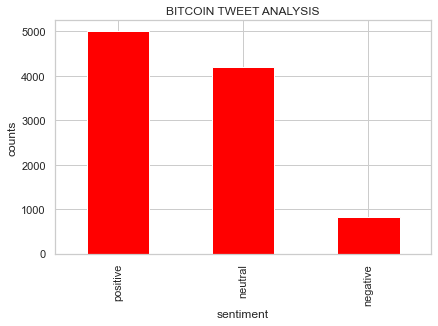

In [52]:
#BAR PLOT
df_text['Analysis'].value_counts()
plt.title('BITCOIN TWEET ANALYSIS')
plt.xlabel('sentiment')
plt.ylabel('counts')
df_text['Analysis'].value_counts().plot(kind='bar',color='red')
plt.show()

In [53]:
#naive bayers
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
from collections import Counter
cnt=Counter()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HARISH A K\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [55]:
#L
stopword = nltk.corpus.stopwords.words('english')

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
df_text.to_csv('df_text.csv')
data = pd.read_csv('df_text.csv')
data

#Encoding Labels and Making Train-Test Splits
x= data['Tweet_Stop'].values
y = data['Analysis'].values
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

#Building the Naive Bayes Classifier
model = MultinomialNB()
model.fit(x, y)
model.score(x_test, y_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [23]:
model.predict(vec.transform(["Bitcoin is significantly better than anyother crypto's"]))
#Creating CSV file
df_text.to_csv(r'df_text.csv', index=False)

NameError: name 'model' is not defined

In [21]:
df_text

,Tweet,Lower_Tweet,Tweet_Punc,Tweet_Stop,Tweet_Freq,Rare_text,Tweet_Stemmed,Tweet_Lemma,Subjectivity,Polarity,Analysis
0,Top cryptocurrencies in the world by Twitter...,top cryptocurrencies in the world by twitter...,Top cryptocurrencies in the world by Twitter...,Top cryptocurrencies world Twitter followers J...,Top cryptocurrencies world Twitter followers J...,Top cryptocurrencies world Twitter followers J...,top cryptocurr world twitter follow jul bnb bi...,Top cryptocurrencies world Twitter follower JU...,0.500000,0.500000,positive
1,bitcoin missed the wma ( USD) by a hair USD,bitcoin missed the wma ( usd) by a hair usd,bitcoin missed the wma USD by a hair USD,bitcoin missed wma USD hair USD,missed wma USD hair USD,missed wma USD hair USD,bitcoin miss wma usd hair usd,bitcoin miss wma USD hair USD,0.000000,0.000000,neutral
2,"MondayMotivaton Crypto""Dollar-cost averaging...","mondaymotivaton crypto""dollar-cost averaging...",MondayMotivaton CryptoDollarcost averaging i...,MondayMotivaton CryptoDollarcost averaging too...,MondayMotivaton CryptoDollarcost averaging too...,MondayMotivaton CryptoDollarcost averaging too...,mondaymotivaton cryptodollarcost averag tool a...,MondayMotivaton CryptoDollarcost average tool ...,0.000000,0.000000,neutral
3,bitcoin is a neutral reserve asset tied to energy,bitcoin is a neutral reserve asset tied to energy,bitcoin is a neutral reserve asset tied to energy,bitcoin neutral reserve asset tied energy,neutral reserve asset tied energy,neutral reserve asset tied energy,bitcoin neutral reserv asset tie energi,bitcoin neutral reserve asset tie energy,0.000000,0.000000,neutral
4,NetworkIndia Its never too lateto make things ...,networkindia its never too lateto make things ...,NetworkIndia Its never too lateto make things ...,NetworkIndia Its never lateto make things righ...,NetworkIndia Its never lateto make things righ...,NetworkIndia Its never lateto make things righ...,networkindia it never lateto make thing rightm...,NetworkIndia Its never lateto make thing right...,0.000000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
9995,Im one of the best fuck your opinion. Bitcoin,im one of the best fuck your opinion. bitcoin,Im one of the best fuck your opinion Bitcoin,Im one best fuck opinion Bitcoin,Im one best fuck opinion,Im one best fuck opinion,im one best fuck opinion bitcoin,Im one best fuck opinion Bitcoin,0.450000,0.300000,positive
9996,If youre a noob or rookie in crypto you should...,if youre a noob or rookie in crypto you should...,If youre a noob or rookie in crypto you should...,If youre noob rookie crypto ONLY DCA If vetera...,If youre noob rookie ONLY DCA If veteran STILL...,If youre ONLY DCA If veteran STILL ONLY DCA An...,if your noob rooki crypto onli dca if veteran ...,If youre noob rookie crypto ONLY DCA If vetera...,0.666667,0.000000,neutral
9997,CONNECT VISION Airdrop Campaign is almost ove...,connect vision airdrop campaign is almost ove...,CONNECT VISION Airdrop Campaign is almost ove...,CONNECT VISION Airdrop Campaign almost 🤔Do mis...,CONNECT VISION Campaign almost 🤔Do miss opport...,CONNECT VISION Campaign almost 🤔Do miss opport...,connect vision airdrop campaign almost 🤔do mis...,CONNECT VISION Airdrop Campaign almost 🤔Do mis...,0.800000,0.400000,positive
9998,Keep buying Bitcoin,keep buying bitcoin,Keep buying Bitcoin,Keep buying Bitcoin,Keep buying,Keep buying,keep buy bitcoin,Keep buying Bitcoin,0.000000,0.000000,neutral


In [24]:
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
st = StandardScaler()
x= data['Tweet_Stop'].values
y = data['Analysis'].values
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
classifier= LogisticRegression(random_state=0)  
classifier.fit(x, y)  
classifier.score(x_test,y_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [23]:
predictions=classifier.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.90      0.63      0.74       193
     neutral       0.89      0.96      0.92      1127
    positive       0.95      0.92      0.93      1180

    accuracy                           0.92      2500
   macro avg       0.91      0.84      0.86      2500
weighted avg       0.92      0.92      0.91      2500



In [24]:
#unigram
c_vec = CountVectorizer(stop_words=stopword, ngram_range=(0,1))

# matrix of ngrams
ngrams = c_vec.fit_transform(df_text['Tweet_Stop'])

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram'})
df_ngram['Polarity'] = df_ngram['Unigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['Subjective'] = df_ngram['Unigram'].apply(lambda x: TextBlob(x).subjectivity)

#Sentiment
def analysis(score):
    if score<=-0.6:
        return 'negative'
    elif score==0.4:
        return 'neutral'
    elif score>=0.5:
        return 'positive'
df_ngram['Sentiment']=df_ngram['Polarity'].apply(analysis)


df_ngram = df_ngram[df_ngram["Sentiment"].str.contains("None") == False]

df_ngram

,Frequency,Unigram,Polarity,Subjective,Sentiment
40,342,top,0.5,0.50,positive
57,281,win,0.8,0.40,positive
78,214,good,0.7,0.60,positive
81,199,perfect,1.0,1.00,positive
89,189,free,0.4,0.80,neutral
...,...,...,...,...,...
9336,1,bloody,-0.8,0.90,negative
9467,1,beloved,0.7,1.00,positive
9675,1,amazingly,0.6,0.90,positive
9750,1,adorable,0.5,1.00,positive


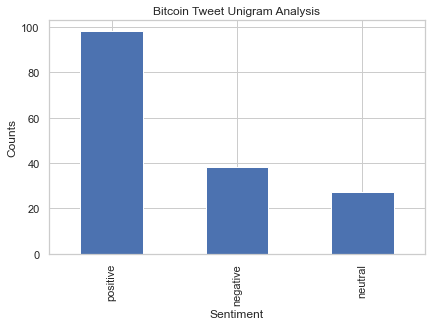

In [25]:
#UNIGRAM visualization
df_ngram['Sentiment']=df_ngram['Polarity'].apply(analysis)

df_ngram['Sentiment'].value_counts()
plt.title('Bitcoin Tweet Unigram Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_ngram['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [26]:
#bigram
c_vec = CountVectorizer(stop_words=stopword, ngram_range=(2,2))

# matrix of ngrams
ngrams = c_vec.fit_transform(df_text['Tweet_Stop'])

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram1 = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'Frequency', 1:'Bigram'})
df_ngram1['Polarity'] = df_ngram1['Bigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram1['Subjective'] = df_ngram1['Bigram'].apply(lambda x: TextBlob(x).subjectivity)

#Sentiment
def analysis(score):
    if score<=-0.6:
        return 'negative'
    elif score==0.4:
        return 'neutral'
    elif score>=0.6:
        return 'positive'
df_ngram1['Sentiment']=df_ngram1['Polarity'].apply(analysis)


df_ngram1 = df_ngram1[df_ngram1["Sentiment"].str.contains("None") == False]

df_ngram1

,Frequency,Bigram,Polarity,Subjective,Sentiment
46,214,announcement win,0.8,0.40,positive
73,163,perfect dump,1.0,1.00,positive
145,64,sound money,0.4,0.40,neutral
152,61,working sound,0.4,0.40,neutral
185,55,one best,1.0,0.30,positive
...,...,...,...,...,...
29378,1,advanced cryptocurrency,0.4,0.60,neutral
29500,1,achieving great,0.8,0.75,positive
29548,1,access free,0.4,0.80,neutral
29566,1,abundant energybtc,0.6,0.95,positive


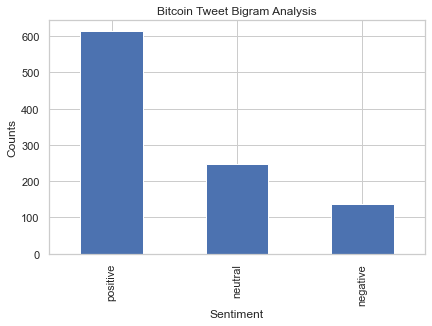

In [27]:
#bigram visualization
df_ngram1['Sentiment'].value_counts()
plt.title('Bitcoin Tweet Bigram Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_ngram1['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [28]:
#trigram
c_vec = CountVectorizer(stop_words=stopword, ngram_range=(3,3))

# matrix of ngrams
ngrams = c_vec.fit_transform(df_text['Tweet_Stop'])

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram2 = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'Frequency', 1:'Trigram'})
df_ngram2['Polarity'] = df_ngram2['Trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram2['Subjective'] = df_ngram2['Trigram'].apply(lambda x: TextBlob(x).subjectivity)

#Sentiment
def analysis(score):
    if score<=-0.6:
        return 'negative'
    elif score==0.4:
        return 'neutral'
    elif score>=0.7:
        return 'positive'
df_ngram2['Sentiment']=df_ngram2['Polarity'].apply(analysis)


df_ngram2 = df_ngram2[df_ngram2["Sentiment"].str.contains("None") == False]

df_ngram2

,Frequency,Trigram,Polarity,Subjective,Sentiment
55,163,perfect dump bitcoin,1.0,1.0,positive
125,61,working sound money,0.4,0.4,neutral
127,61,sound money huma,0.4,0.4,neutral
130,61,considerwe working sound,0.4,0.4,neutral
173,50,playing coinhuntworld awesome,1.0,1.0,positive
...,...,...,...,...,...
31244,1,advanced trading hud,0.4,0.6,neutral
31245,1,advanced payment rail,0.4,0.6,neutral
31246,1,advanced cryptocurrency matrix,0.4,0.6,neutral
31399,1,account followers good,0.7,0.6,positive


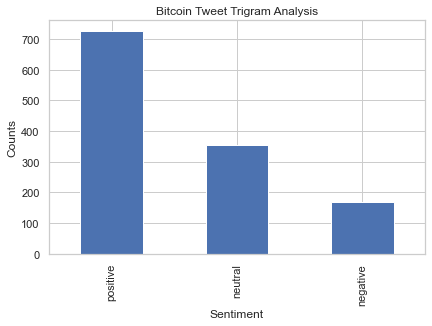

In [29]:
#trigram visualization
df_ngram2['Sentiment'].value_counts()
plt.title('Bitcoin Tweet Trigram Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_ngram2['Sentiment'].value_counts().plot(kind='bar')
plt.show()

In [30]:
ptweet=df_ngram[df_ngram.Sentiment=='positive']
ptweet

,Frequency,Unigram,Polarity,Subjective,Sentiment
40,342,top,0.5,0.50,positive
57,281,win,0.8,0.40,positive
78,214,good,0.7,0.60,positive
81,199,perfect,1.0,1.00,positive
118,143,best,1.0,0.30,positive
...,...,...,...,...,...
9284,1,brave,0.8,1.00,positive
9467,1,beloved,0.7,1.00,positive
9675,1,amazingly,0.6,0.90,positive
9750,1,adorable,0.5,1.00,positive


In [31]:
ntweet=df_ngram[df_ngram.Sentiment=='negative']
ntweet

,Frequency,Unigram,Polarity,Subjective,Sentiment
700,24,fucked,-0.600000,0.700000,negative
714,24,bad,-0.700000,0.666667,negative
1071,14,hate,-0.800000,0.900000,negative
1237,12,dangerous,-0.600000,0.900000,negative
1419,10,impossible,-0.666667,1.000000,negative
1421,10,idiot,-0.800000,0.800000,negative
1943,7,crazy,-0.600000,0.900000,negative
2041,6,sick,-0.714286,0.857143,negative
2346,5,rank,-0.800000,0.900000,negative
2430,5,insane,-1.000000,1.000000,negative


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df_text['Tweet_Stop'])
test_vectors = vectorizer.transform(df_text['Tweet_Stop'])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
error_rates=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
x= data['Tweet_Stop'].values
y = data['Analysis'].values
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)
# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()
knn.fit(x_test,y_test)
    #pred=knn.predict(x_test)
    #error_rates.append(np.sum(y_test != pred))

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [34]:
knn=KNeighborsClassifier(n_neighbors=10,p=1)
knn.fit(x_test,y_test)
knn_pred=knn.predict(x_test)
print(classification_report(knn_pred,y_test))
a=knn.score(x_test,y_test)
print("accuracy score in KNN is ",a)
#plt.plot(list(range(1,40)),error_rates,marker='o',mfc='red',mec='red',ms=5,ls='--')

              precision    recall  f1-score   support

    negative       0.09      1.00      0.17        18
     neutral       1.00      0.60      0.75      1873
    positive       0.52      1.00      0.68       609

    accuracy                           0.70      2500
   macro avg       0.54      0.87      0.53      2500
weighted avg       0.87      0.70      0.73      2500

accuracy score in KNN is  0.7008


In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
 
 # create  object
classy = RandomForestClassifier(n_estimators = 100, random_state = 0)
x= data['Tweet_Stop'].values
y = data['Analysis'].values
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()


 
# fit the regressor with x and y da
classy.fit(x, y)
classy.score(x_test,y_test)

0.9204

In [38]:
from sklearn.svm import SVC
svc=SVC(C=8,kernel='linear',degree=4)
x= data['Tweet_Stop'].values
y = data['Analysis'].values
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

# Vectorize text reviews to numbers
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

svc.fit(x,y)
g=svc.score(x_test,y_test)
print("Accuracy score in SVM is ",g)
pred=svc.predict(x_test)
print(classification_report(y_test,pred))

Accuracy score in SVM is  0.9164
              precision    recall  f1-score   support

    negative       0.75      0.70      0.73       193
     neutral       0.91      0.95      0.93      1127
    positive       0.95      0.92      0.93      1180

    accuracy                           0.92      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.92      0.92      0.92      2500



In [ ]:
data2={'Naive Bayes':[a,c],'Logistic Regression':[b,d],'KNN':[e,f],'SVM':[g,i],'Random Forest Classifier':[h,j]}
df_text=pd.DataFrame(data2,index=['Bitcoin'])
df1